# ALY6140 2022 WinterB Week 4 Assignment

 Assignment Details
The `1962_2006_walmart_store_openings.csv` file is available here:
https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv

It contains information on Walmart store openings between the years 1962-2006. Some explanations on the meaning of variable names:

- `storenum`: the unique store number (storenumber is an id, not a count)	
- `OPENDATE`: the date the original store was opened
- `date_super`: the date the store became a super store
- `conversion`: whether the original store was converted to a super store
- `STRCITY`: the name of the city where the store is located
- `STRSTATE`: the state where the store is located

When answering the questions below, please make sure to examine the dataset carefully and understand if it needs further data aggregation, cleaning, or wrangling before you calcualte the answers to your questions.

#### [GRADED  TASK 1]
- Import the dataset and ensure all columns of data are properly read into an appropriate data structure.

- Find the shape of the dataset and explore whether there exists any null values

In [22]:
# Your answer to Graded Task 1 here:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

walmart_data = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/1962_2006_walmart_store_openings.csv")
print(walmart_data.head(6))
shape = walmart_data.shape
print(walmart_data.shape)
walmart_data.isnull()

   storenum OPENDATE date_super  conversion  st  county  \
0         1   7/1/62     3/1/97         1.0   5       7   
1         2   8/1/64     3/1/96         1.0   5       9   
2         4   8/1/65     3/1/02         1.0   5       7   
3         8  10/1/67     3/1/93         1.0   5      29   
4         7  10/1/67        NaN         NaN   5     119   
5        10   7/1/68     3/1/98         1.0  40      21   

               STREETADDR            STRCITY STRSTATE  ZIPCODE   type_store  \
0        2110 WEST WALNUT             Rogers       AR    72756  Supercenter   
1        1417 HWY 62/65 N           Harrison       AR    72601  Supercenter   
2       2901 HWY 412 EAST     Siloam Springs       AR    72761  Supercenter   
3   1621 NORTH BUSINESS 9          Morrilton       AR    72110  Supercenter   
4  3801 CAMP ROBINSON RD.  North Little Rock       AR    72118     Wal-Mart   
5     2020 SOUTH MUSKOGEE          Tahlequah       OK    74464  Supercenter   

         LAT       LON  MONTH  D

,storenum,OPENDATE,date_super,conversion,st,county,STREETADDR,STRCITY,STRSTATE,ZIPCODE,type_store,LAT,LON,MONTH,DAY,YEAR
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2987,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2988,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2989,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2990,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


#### [GRADED  TASK 2]

- Which city/cities has the `most` total number of Walmart regular stores? Please print the number as well. 
- Which state/states has the `most` total number of converted super stores? Please print the number as well.

In [4]:
# Your answer to Graded Task 2 here:
walmart_data['most_cities_count']=walmart_data.groupby(['STRCITY'])['STREETADDR'].transform('nunique')
walmart_max_citystore= walmart_data.loc[walmart_data['most_cities_count'].idxmax()]['STRCITY']
walmart_max_citystore_count=walmart_data.loc[walmart_data['most_cities_count'].idxmax()]['most_cities_count']
print(walmart_max_citystore)
print(walmart_max_citystore_count)

# Most number of store in state with count
walmart_data['state_store_count'] = walmart_data.groupby('STRSTATE')['STREETADDR'].transform('nunique')
walmart_max_statestore= walmart_data.loc[walmart_data['state_store_count'].idxmax()]['STRSTATE']
walmart_max_statestore_count= walmart_data.loc[walmart_data['state_store_count'].idxmax()]['state_store_count']
print(walmart_max_statestore)
print(walmart_max_statestore_count)

Houston
14
TX
315


[GRADED  TASK 3]
Write a function `convertDF` that takes following arguments:

1. the data frame you generated above from importing the Walmart dataset
2. a state abbreviaton (e.g. `AR`)

and, then, the function returns a pandas Data Frame with 2 columns: 
1. a column called `date` that contains the date (note that date must be properly ordered)
2. a column called `count` that contains the number of stores opened in that state at the date

In [9]:
# Your answer to Graded Task 3 here:
def convertDF(input_df,state):
    input_df['date']=pd.to_datetime(input_df[['YEAR','MONTH','DAY']],format='%Y-%m-%d')
    data_state=input_df[input_df['STRSTATE']==state]
    output_df=data_state.groupby('date').size()
    output_df=output_df.to_frame()
    output_df=output_df.reset_index()
    output_df.columns=[str(column) for column in output_df.columns]
    output_df['count']=output_df['0'].cumsum()
    output_df=output_df.drop(columns=['0'])
    return output_df

In [13]:
# Please don't change this cell
convertDF(walmart_data, 'NV')

,date,count
0,1990-10-29,1
1,1991-01-30,3
2,1991-07-02,4
3,1992-08-04,5
4,1994-01-25,6
5,1994-07-26,7
6,1995-11-01,8
7,1995-12-30,9
8,1996-06-26,10
9,1998-01-26,13


#### [GRADED  TASK 4]
Using any plotting libraries we discussed (`matplotlib`, `seaborn`, or `bokeh`), plot the __time series of cumulative store count__ over time in the state of Nevada(NV) and Nebraska(NE). Please show them in one figure. 

Hint: You might need to use the function defined in task 3

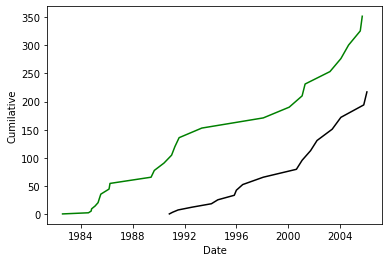

In [17]:
# Your answer to Graded Task 4 here:
nv=convertDF(walmart_data, 'NV')
nv['date'] = pd.to_datetime(nv['date'])
nv['cumilative_sum']=nv['count'].cumsum()
nv.set_index('date',inplace=True)
nv
ne=convertDF(walmart_data, 'NE')
ne['date'] = pd.to_datetime(ne['date'])
ne['cumilative_sum']=ne['count'].cumsum()
ne.set_index('date',inplace=True)
ne
x=nv['cumilative_sum']
y=ne['cumilative_sum']

plt.plot(nv['cumilative_sum'],color="black")
plt.plot(ne['cumilative_sum'],color="green")
plt.xlabel("Date")
plt.ylabel("Cumilative")

plt.show()

#### [GRADED  TASK 5]
Using `plotly`, plot a choropleth map that shows the total number of Supercenter in each state.

In [23]:
# Your answer to Graded Task 5 here:
import plotly.express as px
figure = px.choropleth(walmart_data, locations="STRSTATE", locationmode="USA-states", color="state_store_count",scope="usa",range_color=(0, 12), labels={'state_store_count':'Supercenter in state'})
figure.show()


ValueError: Value of 'color' is not the name of a column in 'data_frame'. Expected one of ['storenum', 'OPENDATE', 'date_super', 'conversion', 'st', 'county', 'STREETADDR', 'STRCITY', 'STRSTATE', 'ZIPCODE', 'type_store', 'LAT', 'LON', 'MONTH', 'DAY', 'YEAR'] but received: state_store_count